In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

       
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'
tables = pd.read_html(url, decimal=',', thousands=' ')
df = tables[12]  


In [3]:
# Вивести перші рядки таблиці за допомогою методу head
print(df.head())


             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [77]:
# Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
print(df.shape)

(28, 9)


In [4]:
# Замініть у таблиці значення "—" на значення NaN
df.replace("—", np.nan, inplace=True)


In [5]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes
print(df.dtypes)


Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [6]:
# Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [7]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
print(df.isnull().sum())

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64


In [8]:
# Видаліть з таблиці дані по всій країні, останній рядок таблиці
df_u = df[-1:] # - рядок, збережений для побудови графіка в кінці завдання
df = df.iloc[:-1, :]


In [9]:
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
numeric_cols = df.select_dtypes(include=[np.number]).columns  
df.loc[:, numeric_cols] = df.loc[:, numeric_cols].fillna(df[numeric_cols].mean())

In [10]:
# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
average_2019 = df['2019'].mean()
regions_above_avg = df[df['2019'] > average_2019]['Регіон']
print("Регіони з народжуваністю вище середнього у 2019 році:", regions_above_avg)

Регіони з народжуваністю вище середнього у 2019 році: 2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


In [11]:
# У якому регіоні була найвища народжуваність у 2014 році?
max_birth_2014 = df['2014'].idxmax()
print("Регіон з найвищою народжуваністю у 2014 році:", df.loc[max_birth_2014, 'Регіон'])

Регіон з найвищою народжуваністю у 2014 році: Рівненська


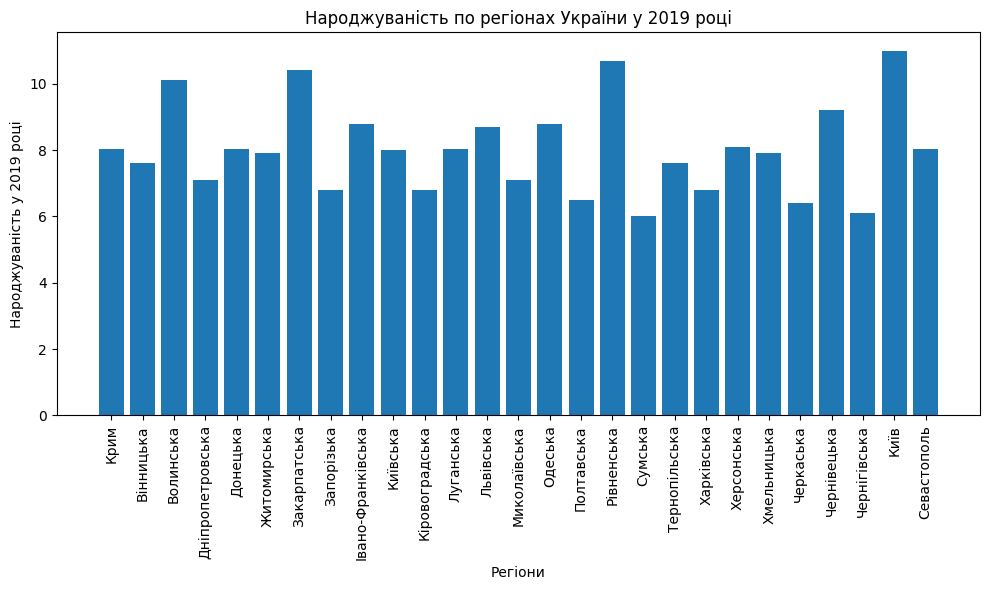

In [12]:
# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df['Регіон'], df['2019'])
plt.xlabel('Регіони')
plt.ylabel('Народжуваність у 2019 році')
plt.xticks(rotation=90)
plt.title('Народжуваність по регіонах України у 2019 році')
plt.tight_layout()
plt.show()

In [13]:
years = df_u.iloc[0].index[1:]
ukraine_birth_rate = df_u.values[0][1:]
# df = df[0:24]
# print(df[0:24])
# print(df['1950'].values[1:])


<Figure size 1000x600 with 0 Axes>

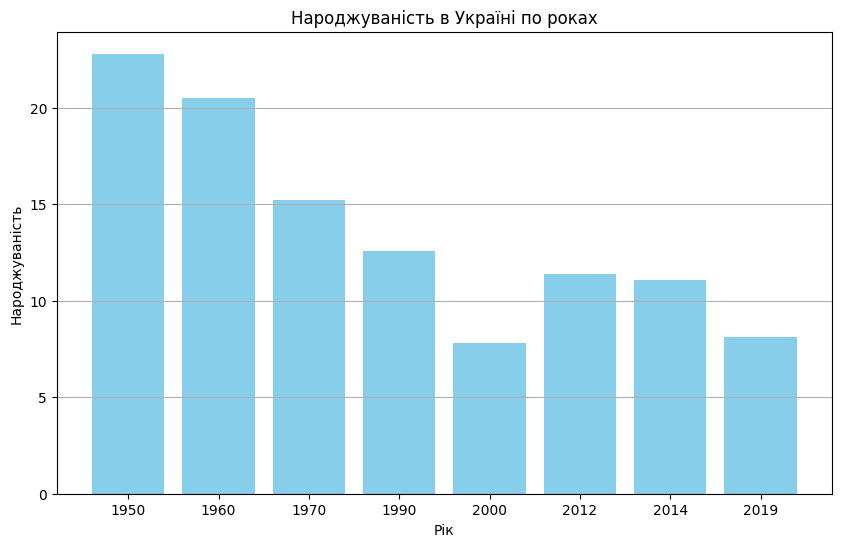

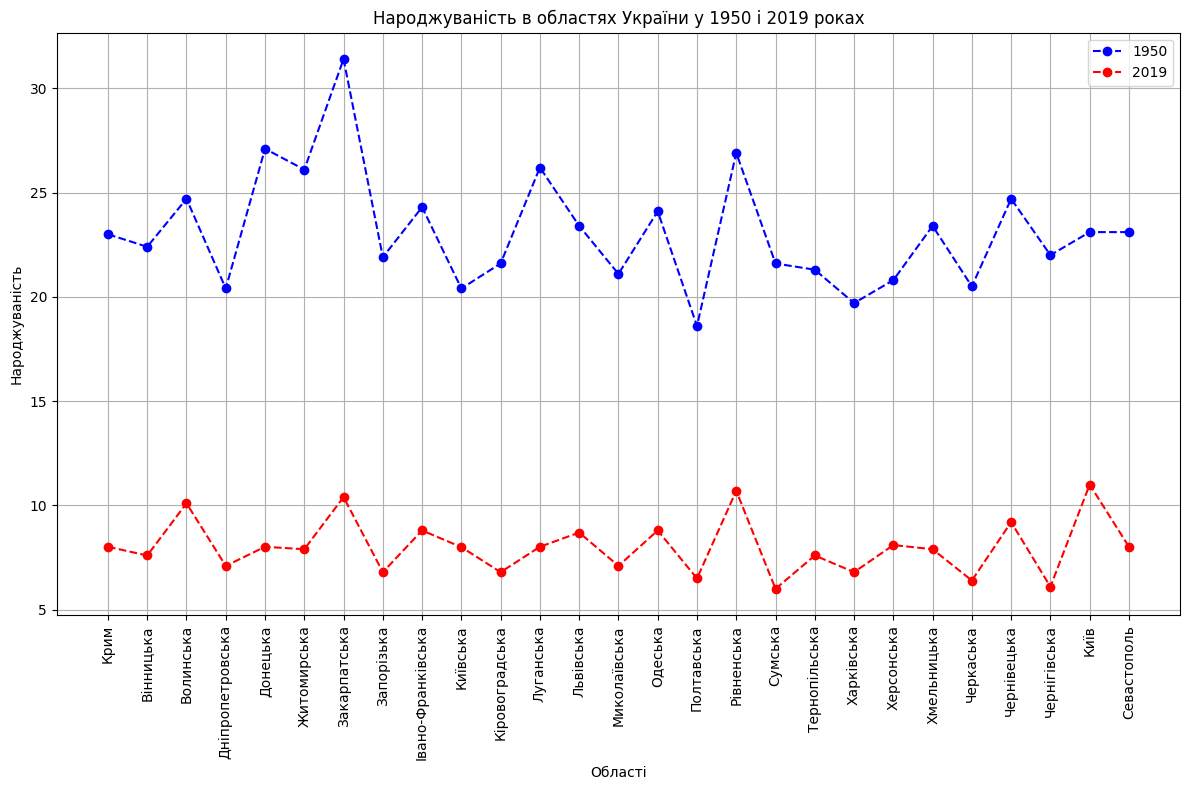

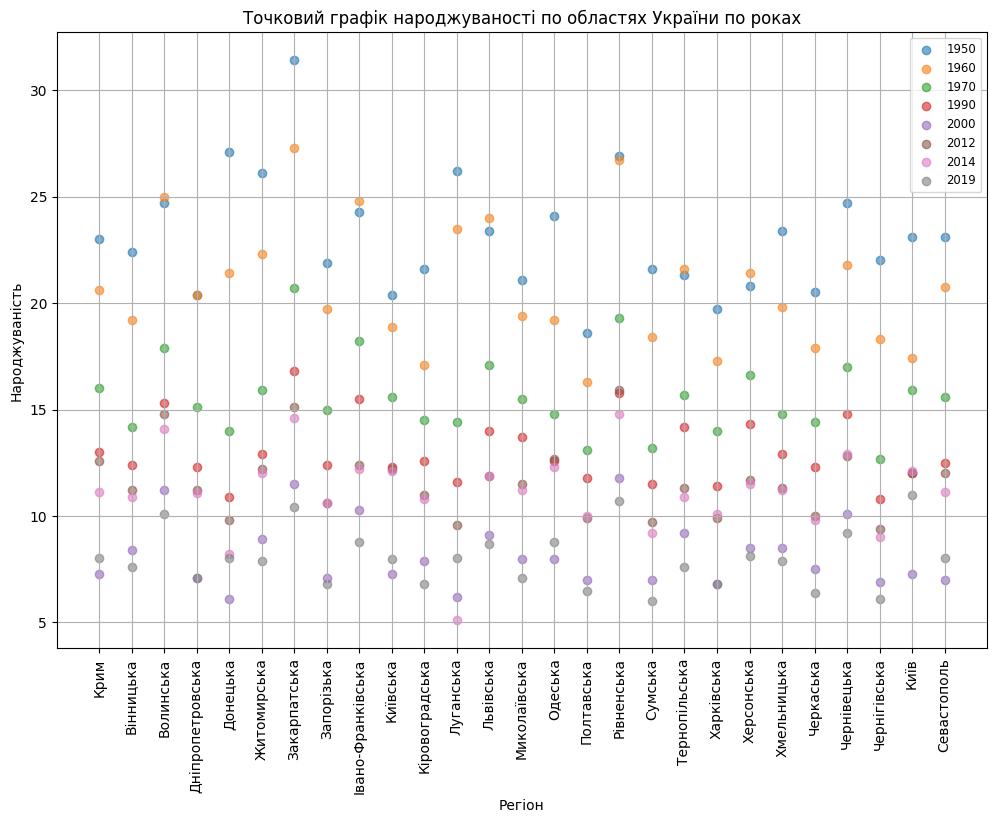

In [53]:
# Графік 1: Стовпчиковий графік народжуваності в Україні по роках
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.bar(years, ukraine_birth_rate, color='skyblue')
plt.title("Народжуваність в Україні по роках")
plt.xlabel("Рік")
plt.ylabel("Народжуваність")
plt.xticks(years)
plt.grid(axis='y')
plt.show()


# Графік 2: Лінійний графік народжуваності по областях у 1950 та 2019 роках
fig, ax = plt.subplots(figsize=(12, 8))

# 1950
ax.plot(df['Регіон'], df['1950'], marker='o', label='1950', color='blue', linestyle="--")

# 2019
ax.plot(df['Регіон'], df['2019'], marker='o', label='2019', color='red', linestyle="--")

plt.title("Народжуваність в областях України у 1950 і 2019 роках")
plt.xlabel("Області")
plt.ylabel("Народжуваність")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Графік 3: Точковий графік народжуваності в областях по роках
plt.figure(figsize=(12, 8))
for col in range(1,9):
    plt.scatter(df['Регіон'], df.iloc[:,col], label=df.iloc[:,col].name, alpha=0.6)
plt.title("Точковий графік народжуваності по областях України по роках")
plt.xlabel("Регіон")
plt.ylabel("Народжуваність")
plt.xticks(rotation=90)
# plt.xticks(list(birth_rates_by_year.keys()))
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)

plt.show()